In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [ ]:
train_num_correct = (np.concatenate([np.load("../data/MATH_aug/train_aug_1_answer_types5_seed2.npy"), np.load("../data/MATH_aug/train_aug_2_answer_types5_seed2.npy")], axis=0)==0).sum(axis=-1)
easy_idxs = np.where(train_num_correct>2)[0]
hard_idxs = np.where(train_num_correct<=2)[0]

In [3]:
with open('data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [30]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard = []

for HARD_RATIO in [1., 0.75, 0.5, 0.25]:
    EASY_RATIO=(1-HARD_RATIO)*0.35
    MEDIUM_RATIO=(1-HARD_RATIO)*0.65


    CKPT_NAME=f"math_aug_easy{EASY_RATIO:.2f}_medium{MEDIUM_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
        # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



        num_memorized_all = []
        num_correct_different_all = []
        num_incorrect_all = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_all.append(num_memorized)
            num_correct_different_all.append(num_correct_different)
            num_incorrect_all.append(num_incorrect)

        num_memorized_all = np.array(num_memorized_all)
        num_correct_different_all = np.array(num_correct_different_all)
        num_incorrect_all = np.array(num_incorrect_all)
        
        ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard.append(ratios)
ratios_all_testhard= np.array(ratios_all_testhard)
        # ratios_all_testeasy

In [36]:
NUM_TRAIN_POINTS=20000

ratios_all_testhard2 = []

for EASY_RATIO in [1., 0.75, 0.5, 0.25,0.]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []
    for checkpoint_strs in ["2000", "4000", "6000", "8000"]:

        train_correct = np.load("ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answer_types5_seed2.npy")==0
        train_samples = np.load("ckpts/"+CKPT_NAME+"/checkpoint-"+checkpoint_strs+"/train_aug_subsample_answers5_seed2.npy")
        # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
        # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



        num_memorized_all = []
        num_correct_different_all = []
        num_incorrect_all = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_all.append(num_memorized)
            num_correct_different_all.append(num_correct_different)
            num_incorrect_all.append(num_incorrect)

        num_memorized_all = np.array(num_memorized_all)
        num_correct_different_all = np.array(num_correct_different_all)
        num_incorrect_all = np.array(num_incorrect_all)
        
        ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard2.append(ratios)
ratios_all_testhard2= np.array(ratios_all_testhard2)
        # ratios_all_testeasy

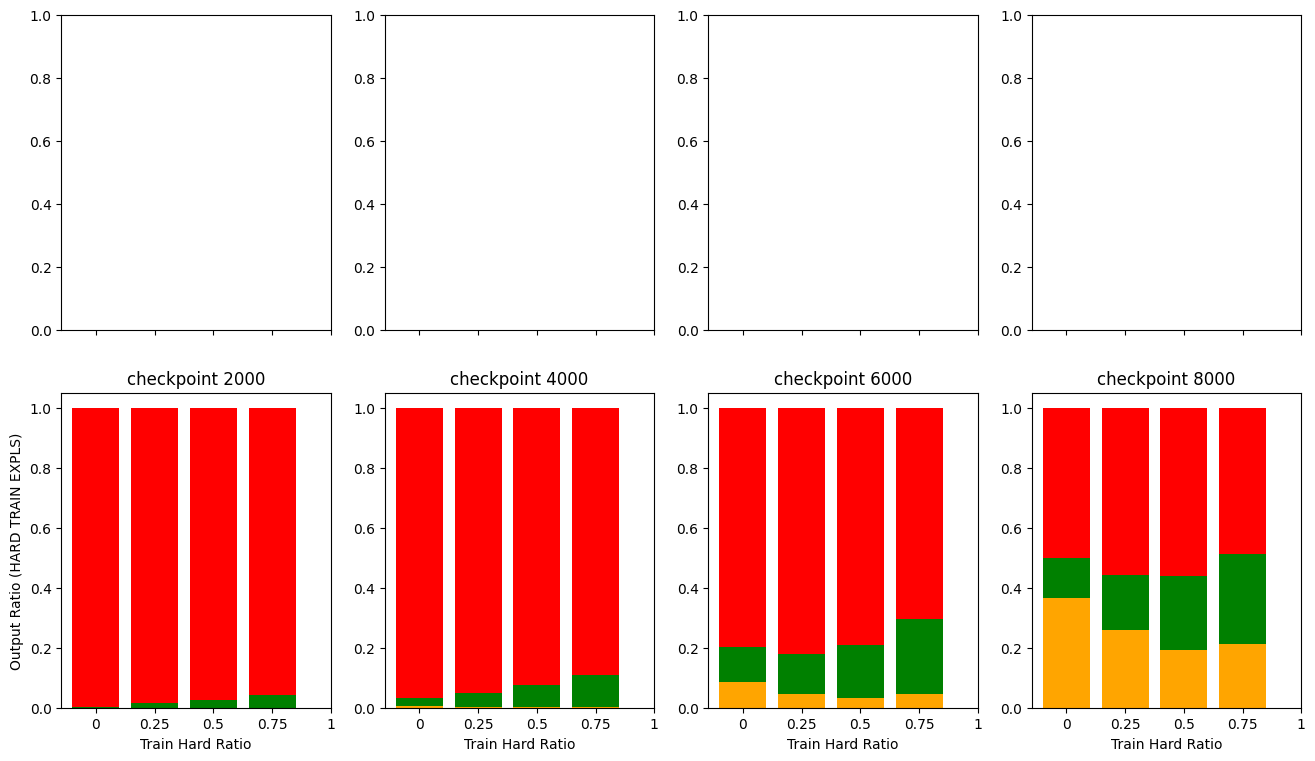

In [31]:
# [exact_match/total, correct_different/total, incorrect/total]

fig, axs = plt.subplots(2, 4, figsize=(16, 9), sharex=True)

# j=0
# for i in range(4):
#     for k in range(4):

#         axs[j][i].bar([k], [1], color='r', label = "incorrect")
#         axs[j][i].bar([k], [1-ratios_all_testeasy[k][i][1]], color='orange', label = "correct memorized")
#         axs[j][i].bar([k], [1-ratios_all_testeasy[k][i][1]-ratios_all_testeasy[k][i][0]], color='g', label = "correct different")

#         # axs[j][i].bar([2], [1], color='r')
#         # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
#         # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

#         # axs[j][i].bar([1], [1], color='r')
#         # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
#         # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
#         # axs[j][i].bar([0], [1], color='r')
#         # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
#         # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
#     axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
#     axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
#     axs[j][i].set_xlabel("Train Hard Ratio")
#     axs[j][0].set_ylabel("Output Ratio (EASY TRAIN EXPLS)")
    
j=1
for i in range(4):
    for k in range(4):

        axs[j][i].bar([k], [1], color='r', label = "incorrect")
        # axs[j][i].bar([k], [1-ratios_all_testhard[k][i][1]], color='orange', label = "correct memorized")
        # axs[j][i].bar([k], [1-ratios_all_testhard[k][i][1]-ratios_all_testhard[k][i][0]], color='g', label = "correct different")


        axs[j][i].bar([k], [1-ratios_all_testhard[k][i][1]], color='g', label = "correct memorized")
        axs[j][i].bar([k], [ratios_all_testhard[k][i][0]], color='orange', label = "correct different")

        # axs[j][i].bar([2], [1], color='r')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]+ratios_hard0pt75[i][0]], color='orange')
        # axs[j][i].bar([2], [ratios_hard0pt75[i][1]], color='g')

        # axs[j][i].bar([1], [1], color='r')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]+ratios_hard0pt5[i][0]], color='orange')
        # axs[j][i].bar([1], [ratios_hard0pt5[i][1]], color='g')
        # axs[j][i].bar([0], [1], color='r')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]+ratios_hard0pt25[i][0]], color='orange')
        # axs[j][i].bar([0], [ratios_hard0pt25[i][1]], color='g')
        
    axs[j][i].set_title(f"checkpoint {(i+1)*2000}")
    axs[j][i].set_xticks([0, 1, 2, 3, 4], ["0", "0.25", "0.5", "0.75", "1"])
    axs[j][i].set_xlabel("Train Hard Ratio")
    axs[j][0].set_ylabel("Output Ratio (HARD TRAIN EXPLS)")
# fig.legend(loc='center right')


In [32]:
ratios_all_testhard[:, -1, 0]

array([0.3644, 0.2578, 0.1928, 0.2126])

In [33]:
NUM_TRAIN_POINTS=20000

test_accs = []

for HARD_RATIO in [1., 0.75, 0.5, 0.25]:
    EASY_RATIO=(1-HARD_RATIO)*0.35
    MEDIUM_RATIO=(1-HARD_RATIO)*0.65


    CKPT_NAME=f"math_aug_easy{EASY_RATIO:.2f}_medium{MEDIUM_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    test_acc = (np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean()
    print(test_acc)
    test_accs.append(test_acc)

0.23476
0.27668
0.28804
0.284


In [37]:
NUM_TRAIN_POINTS=20000

test_accs2 = []

for EASY_RATIO in [1., 0.75, 0.5, 0.25,0.]:
    HARD_RATIO=(1-EASY_RATIO)


    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"

    test_acc = (np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean()
    print(test_acc)
    test_accs2.append(test_acc)

0.24588
0.27296
0.28092
0.285
0.26832


Text(0.5, 1.0, 'MATH')

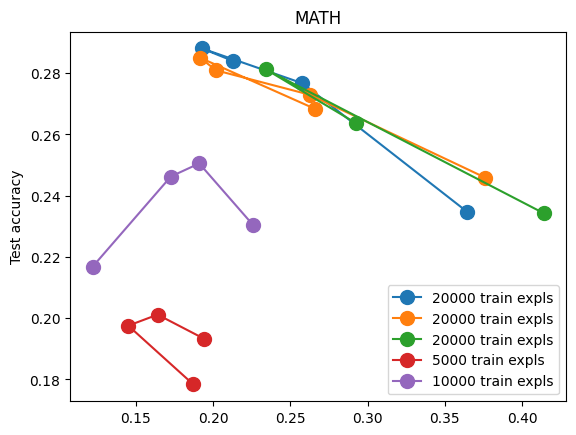

In [100]:
# plt.plot(1-ratios_all_testhard[:, -1, 0]-ratios_all_testhard[:, -1, 1], test_accs, "o-", markersize=10)
# plt.plot(1-ratios_all_testhard2[:, -1, 0]-ratios_all_testhard2[:, -1, 1], test_accs2, "o-", markersize=10)
# plt.plot(1-ratios_all_testhard3[:, -1, 0]-ratios_all_testhard3[:, -1, 1], test_accs3, "o-", markersize=10)
plt.plot(ratios_all_testhard[:, -1, 0], test_accs, "o-", markersize=10, label="20000 train expls")
plt.plot(ratios_all_testhard2[:, -1, 0], test_accs2, "o-", markersize=10, label="20000 train expls")
plt.plot(ratios_all_testhard3[:, -1, 0], test_accs3, "o-", markersize=10, label="20000 train expls")
plt.plot(ratios_all_testhard4[:, -1, 0], test_accs4, "o-", markersize=10, label="5000 train expls")
plt.plot(ratios_all_testhard5[:, -1, 0], test_accs5, "o-", markersize=10, label="10000 train expls")


# plt.xlabel("Ratio of incorrect samples (>0/5 sample inccorect) in train examples")
plt.ylabel("Test accuracy")

plt.legend()
plt.title("MATH")

Text(0.5, 1.0, 'MATH')

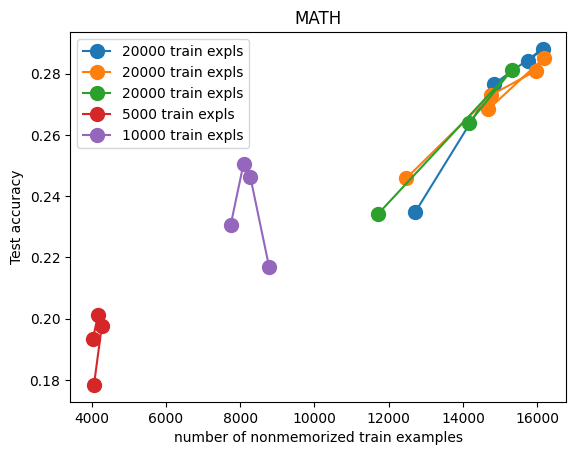

In [101]:
plt.plot((1-ratios_all_testhard[:, -1, 0])*20000, test_accs, "o-", markersize=10, label="20000 train expls")
plt.plot((1-ratios_all_testhard2[:, -1, 0])*20000, test_accs2, "o-", markersize=10, label="20000 train expls")
plt.plot((1-ratios_all_testhard3[:, -1, 0])*20000, test_accs3, "o-", markersize=10, label="20000 train expls")
plt.plot((1-ratios_all_testhard4[:, -1, 0])*5000, test_accs4, "o-", markersize=10, label="5000 train expls")
plt.plot((1-ratios_all_testhard5[:, -1, 0])*10000, test_accs5, "o-", markersize=10, label="10000 train expls")



plt.xlabel("number of nonmemorized train examples")
plt.ylabel("Test accuracy")


plt.legend()
plt.title("MATH")

In [90]:
ratios_all_testhard4

array([[[0.1872    , 0.69      ]],

       [[0.14502901, 0.69773955]],

       [[0.16403281, 0.57591518]],

       [[0.194     , 0.4934    ]]])

In [29]:
ratios_all_testhard

[]

In [39]:


NUM_TRAIN_POINTS=20000

ratios_all_testhard3 = []

for CKPT_NAME in ["x_math_aug_easy0.00_medium0.00_hard1.00_total20000_old", "y_math_aug_easy0.38_medium0.38_hard0.25_total20000", "y_math_aug_easy0.50_medium0.50_hard0.00_total20000"]:


    subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []

    train_correct = np.load("ckpts/"+CKPT_NAME+"/train_aug_subsample_answer_types5_seed2.npy")==0
    train_samples = np.load("ckpts/"+CKPT_NAME+"/train_aug_subsample_answers5_seed2.npy")
    # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
    # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_all.append(num_memorized)
        num_correct_different_all.append(num_correct_different)
        num_incorrect_all.append(num_incorrect)

    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)
    
    ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard3.append(ratios)
ratios_all_testhard3= np.array(ratios_all_testhard3)
        # ratios_all_testeasy

In [40]:
ratios_all_testhard3

array([[[0.414 , 0.4456]],

       [[0.2342, 0.4454]],

       [[0.2922, 0.308 ]]])

In [53]:
NUM_TRAIN_POINTS=20000

test_accs3 = []

for CKPT_NAME in ["x_math_aug_easy0.00_medium0.00_hard1.00_total20000_old", "y_math_aug_easy0.38_medium0.38_hard0.25_total20000", "y_math_aug_easy0.50_medium0.50_hard0.00_total20000"]:
    test_acc = (np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean()
    print(test_acc)
    test_accs3.append(test_acc)

0.23428
0.2812
0.26376


In [83]:


# NUM_TRAIN_POINTS=0000

ratios_all_testhard4 = []

for CKPT_NAME in ["math_aug_easy0.00_medium0.00_hard1.00_total5000", "math_aug_easy0.09_medium0.16_hard0.75_total5000", "math_aug_easy0.26_medium0.49_hard0.25_total5000", "math_aug_easy0.35_medium0.65_hard0.00_total5000"]:


    subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []

    train_correct = np.load("ckpts/"+CKPT_NAME+"/train_aug_subsample_answer_types5_seed2.npy")==0
    train_samples = np.load("ckpts/"+CKPT_NAME+"/train_aug_subsample_answers5_seed2.npy")
    # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
    # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_all.append(num_memorized)
        num_correct_different_all.append(num_correct_different)
        num_incorrect_all.append(num_incorrect)

    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)
    
    ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard4.append(ratios)
ratios_all_testhard4= np.array(ratios_all_testhard4)
        # ratios_all_testeasy

In [84]:
NUM_TRAIN_POINTS=20000

test_accs4 = []

for CKPT_NAME in ["math_aug_easy0.00_medium0.00_hard1.00_total5000", "math_aug_easy0.09_medium0.16_hard0.75_total5000", "math_aug_easy0.26_medium0.49_hard0.25_total5000", "math_aug_easy0.35_medium0.65_hard0.00_total5000"]:
    test_acc = (np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean()
    print(test_acc)
    test_accs4.append(test_acc)

0.17836
0.19756
0.20116
0.19332


Text(0.5, 1.0, 'MATH 10000 train expls')

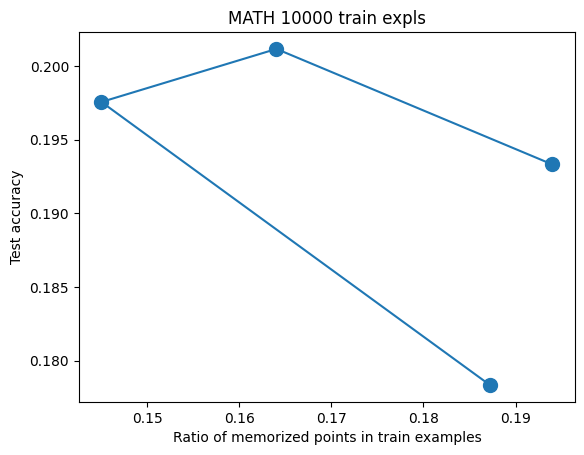

In [85]:
# plt.plot(1-ratios_all_testhard[:, -1, 0]-ratios_all_testhard[:, -1, 1], test_accs, "o-", markersize=10)
# plt.plot(1-ratios_all_testhard2[:, -1, 0]-ratios_all_testhard2[:, -1, 1], test_accs2, "o-", markersize=10)
# plt.plot(1-ratios_all_testhard3[:, -1, 0]-ratios_all_testhard3[:, -1, 1], test_accs3, "o-", markersize=10)
# plt.plot(ratios_all_testhard[:, -1, 1], test_accs, "o-", markersize=10)
# plt.plot(ratios_all_testhard2[:, -1, 1], test_accs2, "o-", markersize=10)
plt.plot(ratios_all_testhard4[:, -1, 0], test_accs4, "o-", markersize=10)


plt.xlabel("Ratio of memorized points in train examples")
plt.ylabel("Test accuracy")


plt.title("MATH 10000 train expls")

In [91]:


# NUM_TRAIN_POINTS=0000

ratios_all_testhard5 = []

for CKPT_NAME in ["y_math_aug_easy0.00_medium0.00_hard1.00_total10000", "y_math_aug_easy0.25_medium0.25_hard0.50_total10000", "y_math_aug_easy0.38_medium0.38_hard0.25_total10000", "y_math_aug_easy0.50_medium0.50_hard0.00_total10000"]:


    subsample_idxs = np.load("ckpts/"+CKPT_NAME+"/subsample_idxs.npy")[:5000]


    ratios = []

    train_correct = np.load("ckpts/"+CKPT_NAME+"/train_aug_subsample_answer_types5_seed2.npy")==0
    train_samples = np.load("ckpts/"+CKPT_NAME+"/train_aug_subsample_answers5_seed2.npy")
    # hard_subsample = np.where(np.isin(subsample_idxs, hard_idxs))[0]
    # easy_subsample = np.where(np.isin(subsample_idxs, easy_idxs))[0]



    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_all.append(num_memorized)
        num_correct_different_all.append(num_correct_different)
        num_incorrect_all.append(num_incorrect)

    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)
    
    ratios.append([(num_memorized_all==5).mean(),  (num_incorrect_all>0).mean()])
    ratios_all_testhard5.append(ratios)
ratios_all_testhard5= np.array(ratios_all_testhard5)
        # ratios_all_testeasy

In [96]:
ratios_all_testhard5

array([[[0.122 , 0.811 ]],

       [[0.1726, 0.5876]],

       [[0.191 , 0.4968]],

       [[0.2258, 0.3858]]])

In [92]:
NUM_TRAIN_POINTS=20000

test_accs5 = []

for CKPT_NAME in ["y_math_aug_easy0.00_medium0.00_hard1.00_total10000", "y_math_aug_easy0.25_medium0.25_hard0.50_total10000", "y_math_aug_easy0.38_medium0.38_hard0.25_total10000", "y_math_aug_easy0.50_medium0.50_hard0.00_total10000"]:
    test_acc = (np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean()
    print(test_acc)
    test_accs5.append(test_acc)

0.21684
0.24624
0.25052
0.23044
